In [6]:
from pygam import GAM, s, te

GAM(s(0, n_splines=200) + te(3,1) + s(2), distribution='poisson', link='log')

GAM(callbacks=['deviance', 'diffs'], distribution='poisson', 
   fit_intercept=True, link='log', max_iter=100, 
   terms=s(0) + te(3, 1) + s(2), tol=0.0001, verbose=False)

In [1]:
from pygam import PoissonGAM, s, te
from pygam.datasets import chicago

In [7]:
X, y = chicago(return_X_y=True)
X.shape

(4863, 4)

In [3]:
y

array([130., 101., 135., ..., 132., 133., 145.])

In [4]:
# pyGAM 可以通过tensor products（张量积）来拟合交叉项
gam = PoissonGAM(s(0, n_splines=200) + te(3, 1) + s(2))
gam

PoissonGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, 
   max_iter=100, terms=s(0) + te(3, 1) + s(2), tol=0.0001, 
   verbose=False)

In [5]:
gam.fit(X, y)

PoissonGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, terms=s(0) + te(3, 1) + s(2) + intercept, tol=0.0001,
   verbose=False)

In [8]:
gam.summary()

PoissonGAM                                                                                                
=============================================== ==========================================================
Distribution:                       PoissonDist Effective DoF:                                    249.5193
Link Function:                          LogLink Log Likelihood:                                -18742.3323
Number of Samples:                         4863 AIC:                                            37983.7032
                                                AICc:                                           38011.0308
                                                UBRE:                                               3.2727
                                                Scale:                                                 1.0
                                                Pseudo R-Squared:                                   0.4149
Feature Function                  Lam

C:\Users\WENDY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [10]:
plt.ion()
plt.rcParams['figure.figsize'] = (12, 8)

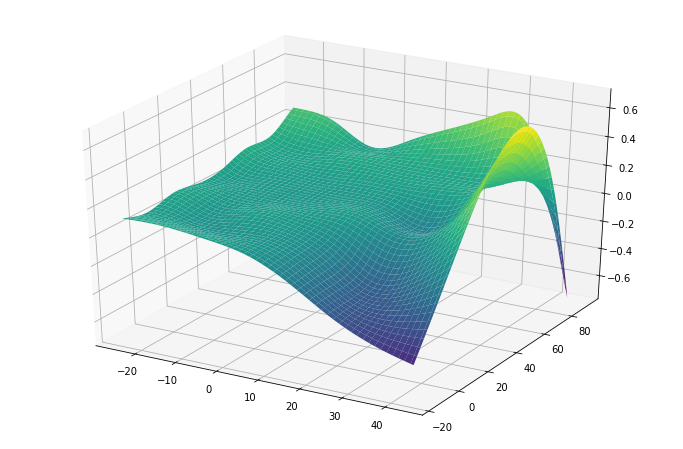

In [11]:
XX = gam.generate_X_grid(term=1, meshgrid=True)
Z = gam.partial_dependence(term=1, X=XX, meshgrid=True)

ax = plt.axes(projection='3d')
ax.plot_surface(XX[0], XX[1], Z, cmap='viridis')

In [12]:
# For simple interactions it is sometimes useful to add a by-variable to a term
from pygam import LinearGAM, s
from pygam.datasets import toy_interaction

X, y = toy_interaction(return_X_y=True)
X.shape

(50000, 2)

In [14]:
y.shape

(50000,)

In [15]:
gam = LinearGAM(s(0, by=1)).fit(X, y)
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                       20.85
Link Function:                     IdentityLink Log Likelihood:                              -2289870.3401
Number of Samples:                        50000 AIC:                                          4579784.3802
                                                AICc:                                         4579784.4002
                                                GCV:                                                0.0101
                                                Scale:                                              0.0101
                                                Pseudo R-Squared:                                   0.9976
Feature Function                  Lam

C:\Users\WENDY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  


# 回归

In [17]:
# 对于回归问题，我们可以使用linear GAM
from pygam import LinearGAM, s, f
from pygam.datasets import wage
X, y = wage(return_X_y=True)
X.shape

(3000, 3)

In [18]:
y.shape

(3000,)

In [19]:
## model
gam = LinearGAM(s(0) + s(1) + f(2))
gam

LinearGAM(callbacks=['deviance', 'diffs'], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + s(1) + f(2), tol=0.0001, 
   verbose=False)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


<Figure size 864x576 with 0 Axes>

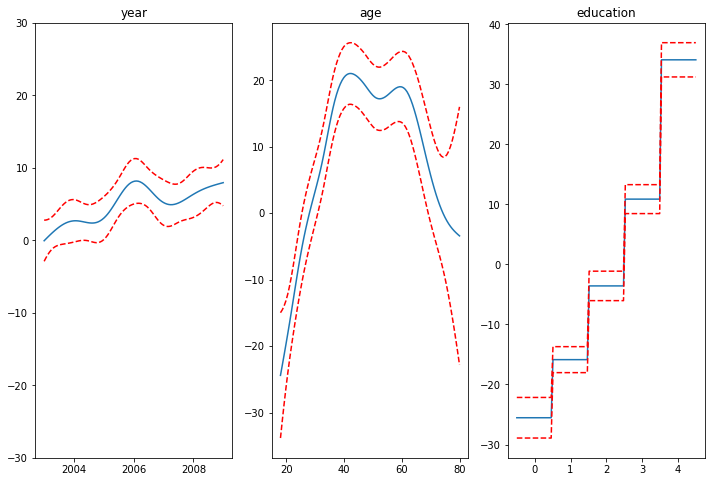

In [20]:
gam.gridsearch(X, y)

## plotting
plt.figure();
fig, axs = plt.subplots(1,3);

titles = ['year', 'age', 'education']
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i]);

In [21]:
# Even though our model allows coefficients, our smoothing penalty reduces us to just 19 effective degrees of freedom
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     19.2602
Link Function:                     IdentityLink Log Likelihood:                                -24116.7451
Number of Samples:                         3000 AIC:                                            48274.0107
                                                AICc:                                           48274.2999
                                                GCV:                                             1250.3656
                                                Scale:                                           1235.9245
                                                Pseudo R-Squared:                                   0.2945
Feature Function                  Lam

C:\Users\WENDY\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [23]:
# 使用LinearGAMs，我们可以查看预测区间
from pygam import LinearGAM
from pygam.datasets import mcycle

In [25]:
X, y = mcycle(return_X_y=True)
X.shape

(133, 1)

In [26]:
y.shape

(133,)

In [27]:
gam = LinearGAM(n_splines=25).gridsearch(X, y)
XX = gam.generate_X_grid(term=0, n=500)

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Text(0.5, 1.0, '95% prediction interval')

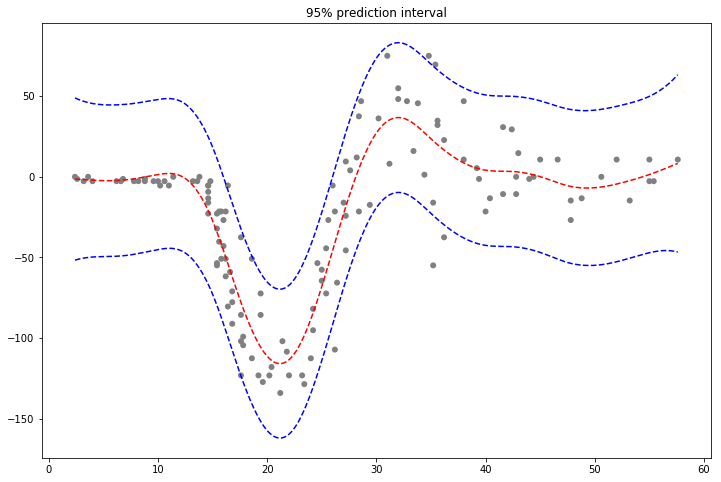

In [32]:
plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')

plt.scatter(X, y, facecolor='gray', edgecolors='none')
plt.title('95% prediction interval')

100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Text(0.5, 1.0, 'draw samples from the posterior of the coefficients')

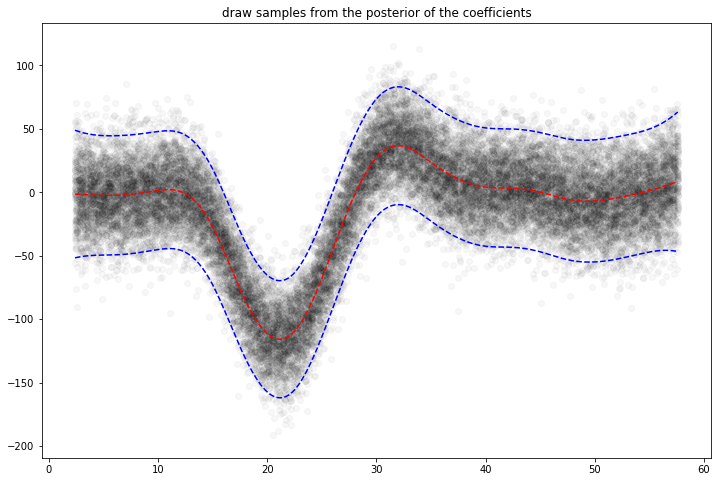

In [33]:
# 根据后验分布进行模拟
# continuing last example with the mcycle dataset
for response in gam.sample(X, y, quantity='y', n_draws=50, sample_at_X=XX):
    plt.scatter(XX, response, alpha=.03, color='k')
plt.plot(XX, gam.predict(XX), 'r--')
plt.plot(XX, gam.prediction_intervals(XX, width=.95), color='b', ls='--')
plt.title('draw samples from the posterior of the coefficients')

In [37]:
# 可以使用惩罚和约束来将我们的先验知识加入模型中，从而控制过拟合
from pygam import LinearGAM, s
from pygam.datasets import hepatitis

In [ ]:
-可用惩罚
-二阶导数平滑（数值特征默认）
-L2平滑（分类特征默认）

-可用约束
-单调递增/递减平滑
-凸/凹平滑
-周期平滑

我们可以通过使用单调和凹约束将直觉注入到模型中

In [38]:
X, y = hepatitis(return_X_y=True)
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (83, 1)
y shape: (83,)


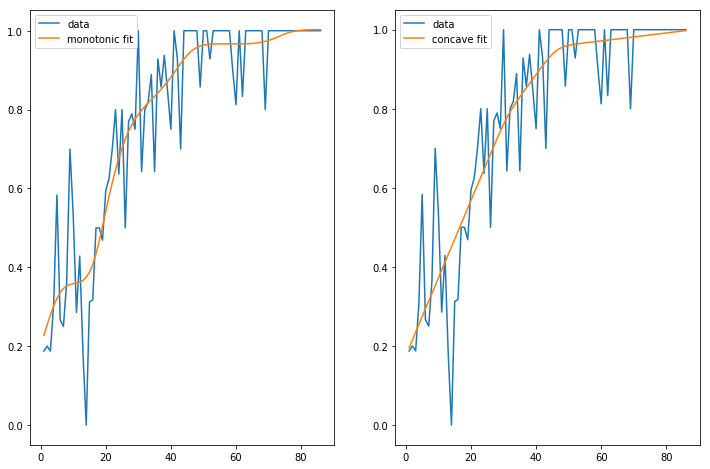

In [39]:
gam1 = LinearGAM(s(0, constraints='monotonic_inc')).fit(X, y)
gam2 = LinearGAM(s(0, constraints='concave')).fit(X, y)

fig, ax = plt.subplots(1, 2)
ax[0].plot(X, y, label='data')
ax[0].plot(X, gam1.predict(X), label='monotonic fit')
ax[0].legend()

ax[1].plot(X, y, label='data')
ax[1].plot(X, gam2.predict(X), label='concave fit')
ax[1].legend()